In [1]:
!pip install cdsapi

  Created wheel for cdsapi: filename=cdsapi-0.2.7-py2.py3-none-any.whl size=11487 sha256=35e0384d6101ba519a590e43b42fad4f96d77e8f386e75f6217fe4918b448edc
  Stored in directory: /root/.cache/pip/wheels/45/dd/13/b6a05d1b30236d50ffcba30bd238fd1db37f6b89cd9ef35951
Successfully built cdsapi


In [0]:
!cp /content/drive/My\ Drive/ATMS597\ Weather\ Climate\ Data\ Analysis/Module\ 6/Project\ 6/.cdsapirc /root/  # copy configuration file to /root

In [3]:
# download 1980-2019 daily (12UTC) soil moisture in soil layer 1 (0-7cm) near the selected station
import cdsapi
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': 'volumetric_soil_water_layer_1',
        'date': '1980-01-01/2019-12-31',
        'time': '12:00',
        'area': '-30.75/-55.5/-31/-55.25',
    },
    '/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 6/Project 6/ERA5_swvl1.nc')

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
2020-05-04 04:23:11,232 INFO Welcome to the CDS
2020-05-04 04:23:11,234 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
2020-05-04 04:23:13,220 INFO Request is queued
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: 

Result(content_length=176428,content_type=application/x-netcdf,location=http://136.156.133.37/cache-compute-0011/cache/data4/adaptor.mars.internal-1588566193.5241575-13002-39-353be67e-a0af-4e46-8400-431ecfa749f4.nc)

In [4]:
# download 1980-2019 daily (12UTC) soil moisture in soil layer 2 (7-28cm) near the selected station
import cdsapi
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': 'volumetric_soil_water_layer_2',
        'date': '1980-01-01/2019-12-31',
        'time': '12:00',
        'area': '-30.75/-55.5/-31/-55.25',
    },
    '/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 6/Project 6/ERA5_swvl2.nc')

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
2020-05-04 04:52:23,335 INFO Welcome to the CDS
2020-05-04 04:52:23,337 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
2020-05-04 04:52:24,493 INFO Request is queued
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: 

Result(content_length=176424,content_type=application/x-netcdf,location=http://136.156.133.42/cache-compute-0014/cache/data7/adaptor.mars.internal-1588567944.576307-28736-17-17fdbb32-b1ab-4bcd-af2b-cb11c760d9d8.nc)

In [5]:
%pylab inline
import xarray as xr
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [6]:
# load the data
swvl1 = xr.open_dataset('/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 6/Project 6/ERA5_swvl1.nc')
swvl1

<xarray.Dataset>
Dimensions:    (latitude: 2, longitude: 2, time: 14610)
Coordinates:
  * longitude  (longitude) float32 -55.5 -55.25
  * latitude   (latitude) float32 -30.75 -31.0
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-04 04:50:44 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [7]:
# load the data
swvl2 = xr.open_dataset('/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 6/Project 6/ERA5_swvl2.nc')
swvl2

<xarray.Dataset>
Dimensions:    (latitude: 2, longitude: 2, time: 14610)
Coordinates:
  * longitude  (longitude) float32 -55.5 -55.25
  * latitude   (latitude) float32 -30.75 -31.0
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    swvl2      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-04 05:16:36 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [0]:
# calculate the time series
swvl1_aave = np.mean(swvl1['swvl1'], axis=(1, 2))
swvl2_aave = np.mean(swvl2['swvl2'], axis=(1, 2))

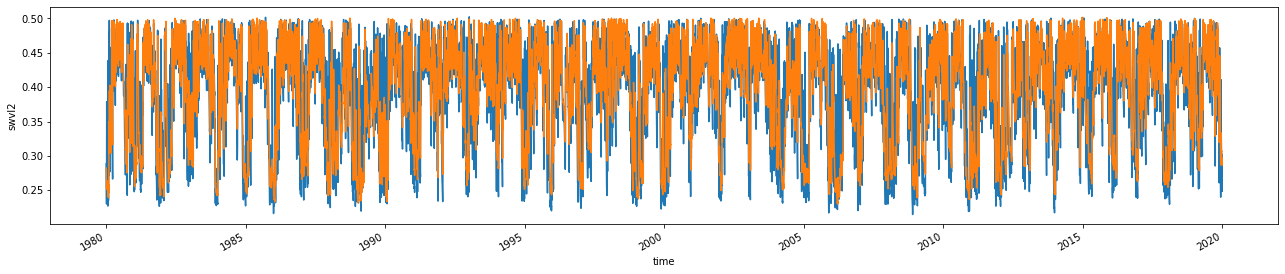

In [9]:
# plot the time series
fig = plt.figure(figsize=(22,4))
swvl1_aave.plot()
swvl2_aave.plot()

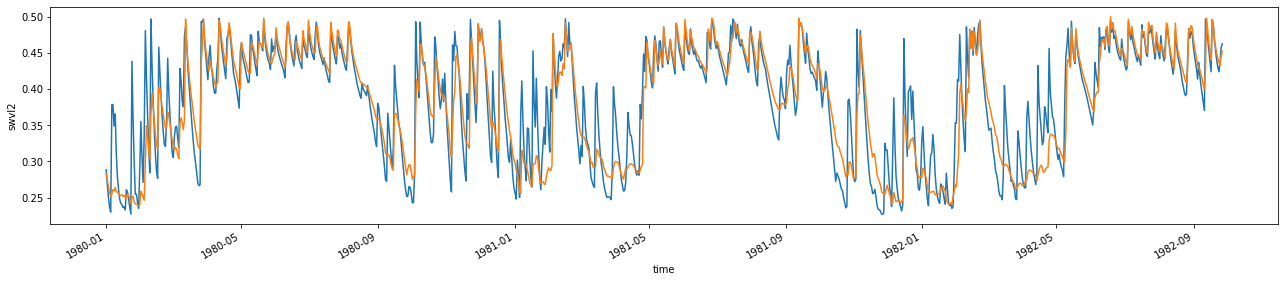

In [10]:
fig = plt.figure(figsize=(22,4))
swvl1_aave[0:1000].plot()
swvl2_aave[0:1000].plot()